**KNN**

According to this algorithm, which is used in classification, feature extraction during classification is used to look at the closeness of the new individual to be categorized to k of the previous individuals.
For example, you want to classify a new element for k = 3. in this case the nearest 3 of the old classified elements are taken. If these elements are included in the class, the new element is also included in that class. The euclide distance can be used in the distance calculation.

# Project - Classify Type of Patient from the biomechanical features of orthopedic patients.

# Install the necessary libraries


In [48]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Importing all the required library functions
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [49]:
# Creating the standard scaler instance
sc = MinMaxScaler()

# Creating LabelEncoder
labelEncoder = preprocessing.LabelEncoder()

### Creating a generic function which returns a dataframe for K, TrainAccuracy, TestAccuracy, TrainTestDiff for given X and y values

In [50]:
def get_train_test_accuracy(X, y):
    neighbors = np.arange(1, 45)
    random_states = np.arange(1, 20)

    mean_train_test = []

    for ii, neighbor in enumerate(neighbors):
        train_accuracy = []
        test_accuracy = []
        for jj, random in enumerate(random_states):

            # This splits the input X and y into train/test dataset with a ratio of 70:30
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random)
            # This gets the mhu and sigma of the train model and stores in sc
            sc.fit(X_train)

            # This transform the X_train and X_test data
            scaledX_train = sc.transform(X_train)
            scaledX_test = sc.transform(X_test)

            # This creates KNN classifier with given neighbors
            knn = KNeighborsClassifier(n_neighbors=neighbor)

            # This build the train model in knn classifier and knn is ready to compute the training, testing accuracy
            knn.fit(scaledX_train, y_train)

            # Calculate the difference in the actual y_test and predicted y values based on the model
            #y_pred = knn.predict(scaledX_test)
            #diff = y_test - y_pred
            
            # Storing the train/test accuracy to compte the mean for all random states
            train_accuracy.append(knn.score (scaledX_train, y_train))
            test_accuracy.append(knn.score (scaledX_test, y_test))

        row = [neighbor, np.mean(train_accuracy), np.mean(test_accuracy)]
        mean_train_test.append(row)

    mean_train_test_df = pd.DataFrame(mean_train_test, columns=['k', 'TrainAccuracy', 'TestAccuracy'])
    mean_train_test_df['TrainTestDiff'] = abs(mean_train_test_df['TrainAccuracy'] - mean_train_test_df['TestAccuracy'])

    return mean_train_test_df

# import data 2C_weka.csv for 2 Class Classifcation.


In [51]:
class2_df = pd.read_csv ('C:/Users/kulkarni1/Documents/AIMLWorkspace/Databases/2Classdata.csv')

# Explore the data set.Get necessary information about the data.

Look at the head and tail of dataset.
Find the missing value.
Look at the unique values of class values.
Look at the distribution of class values and other attributes.
Get the datatype information about the dataset
Plot the distribution of different classes for pelvic_radius and sacral_slope for visualization.

In [52]:
print ('Shape of the data: ', class2_df.shape)

Shape of the data:  (310, 7)


In [53]:
class2_df.head(10)

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal
5,40.250200,13.921907,25.124950,26.328293,130.327871,2.230652,Abnormal
6,53.432928,15.864336,37.165934,37.568592,120.567523,5.988551,Abnormal
7,45.366754,10.755611,29.038349,34.611142,117.270068,-10.675871,Abnormal
8,43.790190,13.533753,42.690814,30.256437,125.002893,13.289018,Abnormal
9,36.686353,5.010884,41.948751,31.675469,84.241415,0.664437,Abnormal


In [54]:
class2_df.tail(10)

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
300,50.676677,6.461501,35.000000,44.215175,116.587970,-0.214711,Normal
301,89.014875,26.075981,69.021259,62.938894,111.481075,6.061508,Normal
302,54.600316,21.488974,29.360216,33.111342,118.343321,-1.471067,Normal
303,34.382299,2.062683,32.390820,32.319617,128.300199,-3.365516,Normal
304,45.075450,12.306951,44.583177,32.768499,147.894637,-8.941709,Normal
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal
309,33.841641,5.073991,36.641233,28.767649,123.945244,-0.199249,Normal


In [55]:
class2_df.dtypes

pelvic_incidence            float64
pelvic_tilt numeric         float64
lumbar_lordosis_angle       float64
sacral_slope                float64
pelvic_radius               float64
degree_spondylolisthesis    float64
class                        object
dtype: object

In [56]:
class2_df.isnull().any()

pelvic_incidence            False
pelvic_tilt numeric         False
lumbar_lordosis_angle       False
sacral_slope                False
pelvic_radius               False
degree_spondylolisthesis    False
class                       False
dtype: bool

In [57]:
class2_df.isna().any()

pelvic_incidence            False
pelvic_tilt numeric         False
lumbar_lordosis_angle       False
sacral_slope                False
pelvic_radius               False
degree_spondylolisthesis    False
class                       False
dtype: bool

In [58]:
class2_df.describe()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


In [59]:
class2_df['class'].unique()

array(['Abnormal', 'Normal'], dtype=object)

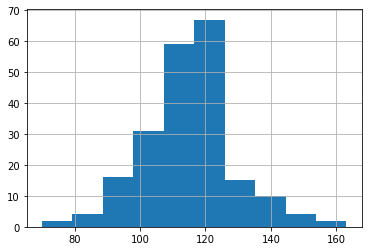

In [60]:
class2_df[class2_df['class'] == 'Abnormal']['pelvic_radius'].hist()

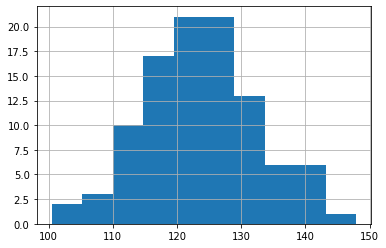

In [61]:
class2_df[class2_df['class'] == 'Normal']['pelvic_radius'].hist()

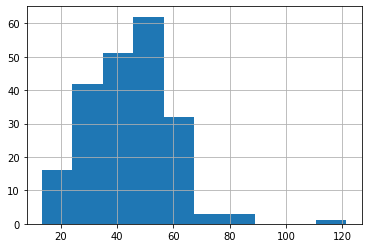

In [62]:
class2_df[class2_df['class'] == 'Abnormal']['sacral_slope'].hist()

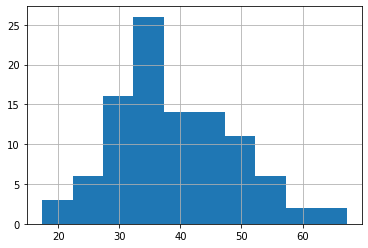

In [63]:
class2_df[class2_df['class'] == 'Normal']['sacral_slope'].hist()

# Encode the Class variable to integer.

In [64]:
class2_df['class'] = labelEncoder.fit_transform(class2_df['class'])
class2_df['class'].unique()

array([0, 1], dtype=int64)

# Create the X(Feature-set) and Y(Target-set) sets for your Data.

In [65]:
class2_df.corr()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
pelvic_incidence,1.000000,0.629199,0.717282,0.814960,-0.247467,0.638743,-0.353336
pelvic_tilt numeric,0.629199,1.000000,0.432764,0.062345,0.032668,0.397862,-0.326063
lumbar_lordosis_angle,0.717282,0.432764,1.000000,0.598387,-0.080344,0.533667,-0.312484
sacral_slope,0.814960,0.062345,0.598387,1.000000,-0.342128,0.523557,-0.210602
pelvic_radius,-0.247467,0.032668,-0.080344,-0.342128,1.000000,-0.026065,0.309857
degree_spondylolisthesis,0.638743,0.397862,0.533667,0.523557,-0.026065,1.000000,-0.443687
class,-0.353336,-0.326063,-0.312484,-0.210602,0.309857,-0.443687,1.000000


In [66]:
class2_df.corr().abs() < 0.1

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
pelvic_incidence,False,False,False,False,False,False,False
pelvic_tilt numeric,False,False,False,True,True,False,False
lumbar_lordosis_angle,False,False,False,False,True,False,False
sacral_slope,False,True,False,False,False,False,False
pelvic_radius,False,True,True,False,False,True,False
degree_spondylolisthesis,False,False,False,False,True,False,False
class,False,False,False,False,False,False,False


In [67]:
(class2_df.corr()['class'].abs() < 0.1).any()

False

### Coorelation of 'class' variable is significant (> 0.1) for all variables.

### So, we will take all Feature set

In [68]:
y = class2_df['class']
X = class2_df.drop('class', axis=1)

# Build the KNN model using Train Dataset and predict the class on test dataset.

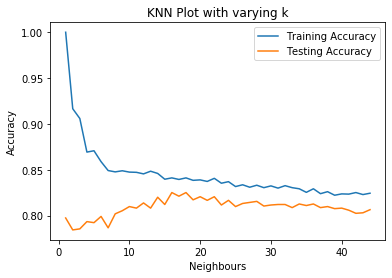

In [70]:
# Calling the get_train_test_accuracy function for Class2 dataset
train_test_diff = get_train_test_accuracy(X, y)

plt.title('KNN Plot with varying k')
plt.plot(train_test_diff['k'], train_test_diff['TrainAccuracy'], label = 'Training Accuracy')
plt.plot(train_test_diff['k'], train_test_diff['TestAccuracy'], label = 'Testing Accuracy')
plt.legend()
plt.xlabel('Neighbours')
plt.ylabel('Accuracy')
plt.show()

# Calculate the performance score of of your classification on test dataset.
Hint- You can use knn.score( ) function.

### Performance score is computed by following logic:
- Find the absolute difference between the Train and Test Accuracy
- Look at the absolute minimal difference between the two Accuracy
- Get the k value corresponding to the higher Test Accuracy and absolute minimal difference between the two Accuracy 

### Performance score is calculated in the get_train_test_accuracy() function itself

### The graph of various k values and the cooresponding Accuracies are plotted in the above chart

# What is the best K value for your classifcation?
#Find at which k value you get the best score.

### This is the optimal solution with maximum Test Accuracy

In [71]:
train_test_diff.loc[train_test_diff['TestAccuracy'].idxmax()]

k                18.000000
TrainAccuracy     0.841135
TestAccuracy      0.825127
TrainTestDiff     0.016008
Name: 17, dtype: float64

### This is the optimal solution with minimal difference between Train and Test Accuracy

In [73]:
train_test_diff.loc[train_test_diff['TrainTestDiff'].idxmin()]

k                35.000000
TrainAccuracy     0.825370
TestAccuracy      0.810979
TrainTestDiff     0.014391
Name: 34, dtype: float64

### Here is choice: Either we choose K value with maximum Test accuracy (18) OR with minimal difference between Train and Test Accuracy (35)

### By increasing the K value from 18 to 35, the Test Accuracy decreases from 0.825 to 0.810

### Hence, 18 is the best K value for the Classification

# import data 3C_weka.csv for 3 Class Classifcation and repeat all the steps which are given above.

In [74]:
class3_df = pd.read_csv ('C:/Users/kulkarni1/Documents/AIMLWorkspace/Databases/3Classdata.csv')

In [75]:
print ('Shape of the data: ', class3_df.shape)

Shape of the data:  (310, 7)


In [76]:
class3_df.head(10)

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia
5,40.250200,13.921907,25.124950,26.328293,130.327871,2.230652,Hernia
6,53.432928,15.864336,37.165934,37.568592,120.567523,5.988551,Hernia
7,45.366754,10.755611,29.038349,34.611142,117.270068,-10.675871,Hernia
8,43.790190,13.533753,42.690814,30.256437,125.002893,13.289018,Hernia
9,36.686353,5.010884,41.948751,31.675469,84.241415,0.664437,Hernia


In [77]:
class3_df.tail(10)

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
300,50.676677,6.461501,35.000000,44.215175,116.587970,-0.214711,Normal
301,89.014875,26.075981,69.021259,62.938894,111.481075,6.061508,Normal
302,54.600316,21.488974,29.360216,33.111342,118.343321,-1.471067,Normal
303,34.382299,2.062683,32.390820,32.319617,128.300199,-3.365516,Normal
304,45.075450,12.306951,44.583177,32.768499,147.894637,-8.941709,Normal
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal
309,33.841641,5.073991,36.641233,28.767649,123.945244,-0.199249,Normal


In [78]:
class3_df.dtypes

pelvic_incidence            float64
pelvic_tilt                 float64
lumbar_lordosis_angle       float64
sacral_slope                float64
pelvic_radius               float64
degree_spondylolisthesis    float64
class                        object
dtype: object

In [79]:
class3_df.isnull().any()

pelvic_incidence            False
pelvic_tilt                 False
lumbar_lordosis_angle       False
sacral_slope                False
pelvic_radius               False
degree_spondylolisthesis    False
class                       False
dtype: bool

In [80]:
class3_df.isna().any()

pelvic_incidence            False
pelvic_tilt                 False
lumbar_lordosis_angle       False
sacral_slope                False
pelvic_radius               False
degree_spondylolisthesis    False
class                       False
dtype: bool

In [81]:
class3_df.describe()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


In [82]:
class3_df['class'].unique()

array(['Hernia', 'Spondylolisthesis', 'Normal'], dtype=object)

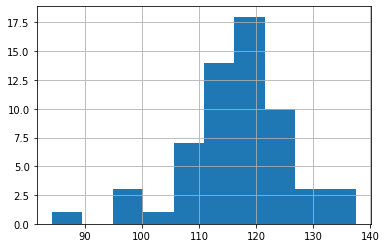

In [83]:
class3_df[class3_df['class'] == 'Hernia']['pelvic_radius'].hist()

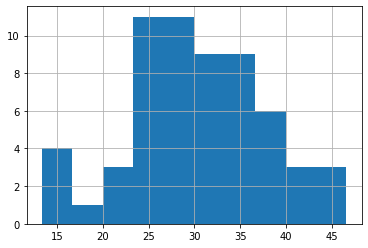

In [84]:
class3_df[class3_df['class'] == 'Hernia']['sacral_slope'].hist()

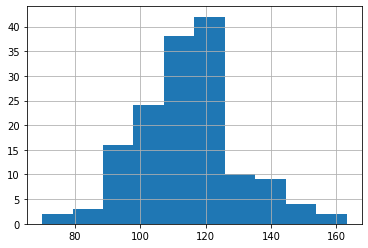

In [85]:
class3_df[class3_df['class'] == 'Spondylolisthesis']['pelvic_radius'].hist()

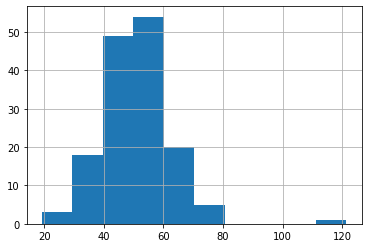

In [86]:
class3_df[class3_df['class'] == 'Spondylolisthesis']['sacral_slope'].hist()

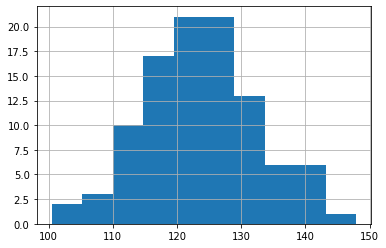

In [87]:
class3_df[class3_df['class'] == 'Normal']['pelvic_radius'].hist()

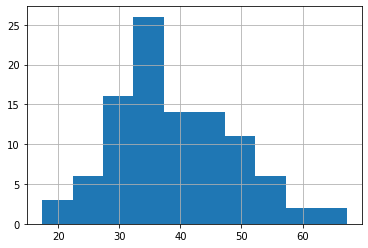

In [88]:
class3_df[class3_df['class'] == 'Normal']['sacral_slope'].hist()

In [89]:
class3_df['class'] = labelEncoder.fit_transform(class3_df['class'])
class3_df['class'].unique()

array([0, 2, 1], dtype=int64)

In [90]:
class3_df.corr()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
pelvic_incidence,1.000000,0.629199,0.717282,0.814960,-0.247467,0.638743,0.590025
pelvic_tilt,0.629199,1.000000,0.432764,0.062345,0.032668,0.397862,0.205158
lumbar_lordosis_angle,0.717282,0.432764,1.000000,0.598387,-0.080344,0.533667,0.636490
sacral_slope,0.814960,0.062345,0.598387,1.000000,-0.342128,0.523557,0.604681
pelvic_radius,-0.247467,0.032668,-0.080344,-0.342128,1.000000,-0.026065,-0.133424
degree_spondylolisthesis,0.638743,0.397862,0.533667,0.523557,-0.026065,1.000000,0.588541
class,0.590025,0.205158,0.636490,0.604681,-0.133424,0.588541,1.000000


In [91]:
class3_df.corr().abs() < 0.1

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
pelvic_incidence,False,False,False,False,False,False,False
pelvic_tilt,False,False,False,True,True,False,False
lumbar_lordosis_angle,False,False,False,False,True,False,False
sacral_slope,False,True,False,False,False,False,False
pelvic_radius,False,True,True,False,False,True,False
degree_spondylolisthesis,False,False,False,False,True,False,False
class,False,False,False,False,False,False,False


In [92]:
(class3_df.corr()['class'].abs() < 0.1).any()

False

### Coorelation of 'class' variable is significant (> 0.1) for all variables.

### So, we will take all Feature set

In [93]:
y = class3_df['class']
X = class3_df.drop('class', axis=1)

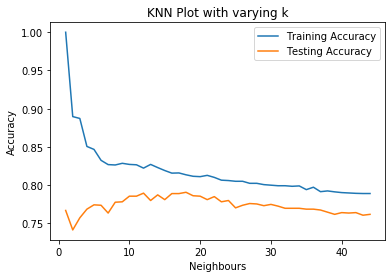

In [94]:
# Calling the get_train_test_accuracy function for Class2 dataset
train_test_diff = get_train_test_accuracy(X, y)

plt.title('KNN Plot with varying k')
plt.plot(train_test_diff['k'], train_test_diff['TrainAccuracy'], label = 'Training Accuracy')
plt.plot(train_test_diff['k'], train_test_diff['TestAccuracy'], label = 'Testing Accuracy')
plt.legend()
plt.xlabel('Neighbours')
plt.ylabel('Accuracy')
plt.show()

### This is the optimal solution with maximum Test Accuracy

In [95]:
train_test_diff.loc[train_test_diff['TestAccuracy'].idxmax()]

k                18.000000
TrainAccuracy     0.813485
TestAccuracy      0.790606
TrainTestDiff     0.022880
Name: 17, dtype: float64

### This is the optimal solution with minimal difference between Train and Test Accuracy

In [97]:
train_test_diff.loc[train_test_diff['TrainTestDiff'].idxmin()]

k                18.000000
TrainAccuracy     0.813485
TestAccuracy      0.790606
TrainTestDiff     0.022880
Name: 17, dtype: float64

### Here, K value of 18 gives highest Test Accuracy and Minimal difference between Train and Test Accuracy.

### Hence, 18 is the best K value for the Classification